In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations

In [2]:
# matplotlib 한글 설정

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
covid19 = pd.read_csv('covid19_daily.csv')
finance = pd.read_csv('finance.csv')
industry = pd.read_csv('industry.csv')
kospi200 = pd.read_csv('kospi200_last.csv')
kospi200['sort'] = kospi200['sort'].fillna(kospi200['name'])
finance_pivot = pd.pivot_table(finance, values='jong_ga', index='date', columns='name')
finance_pivot = finance_pivot.dropna(axis=1)
finance_industry = pd.merge(finance, kospi200, how='left', on='name')
finance_industry = finance_industry.drop(columns=['code','rank'])
finance_industry_pivot = pd.pivot_table(finance_industry, values='jong_ga', index='date', columns='industry', aggfunc='mean')
finance_industry_pivot = finance_industry_pivot.dropna(axis=1)
finance_sort_pivot = pd.pivot_table(finance_industry, values='jong_ga', index='date', columns='sort', aggfunc='mean')
finance_sort_pivot = finance_sort_pivot.dropna(axis=1)

In [4]:
# 회사 상관관계
merge_pivot = pd.merge(covid19, finance_pivot, how='inner', on='date')
merge_pivot = merge_pivot.drop(['male','female'], axis=1)
merge_pivot = merge_pivot.set_index('date')
merge_pivot = merge_pivot[merge_pivot.index>'2022-01-26']
merge_pivot_corr = merge_pivot.corr()

positive_corr_list = list(merge_pivot_corr[merge_pivot_corr['total'] >= 0.4].index)[1:]
negative_corr_list = list(merge_pivot_corr[merge_pivot_corr['total'] <= -0.4].index)
row_corr_list = list(merge_pivot_corr[abs(merge_pivot_corr['total']) <= 0.05].index)

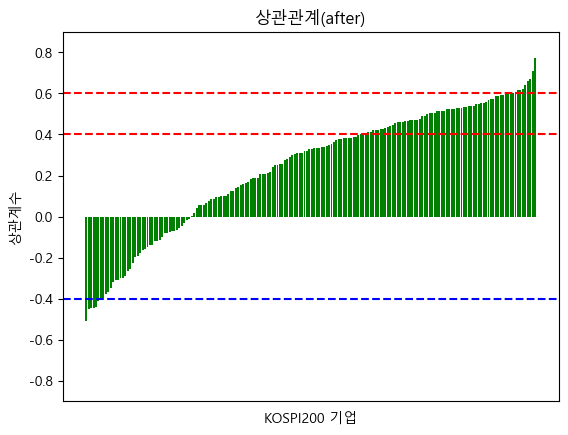

In [5]:
df = merge_pivot_corr['total']
df = df.sort_values().iloc[:-1]
x = df.index
y = df.values

plt.bar(x, y, color='g')
plt.title('상관관계(after)')
plt.xlabel('KOSPI200 기업')
plt.ylabel('상관계수')
plt.xticks([], [])
plt.axhline(y=0.4, color='r', linestyle='--')
plt.axhline(y=0.6, color='r', linestyle='--')
plt.axhline(y=0.-0.4, color='b', linestyle='--')
plt.ylim(-0.9,0.9)

plt.show()

In [6]:
# 상관 계수 유의성 검정
variable_combinations = combinations(merge_pivot_corr.columns, 2)
count = 0
cannot_corr_list = []
for variable_pair in variable_combinations:
    if variable_pair[0] == 'total':
        x = merge_pivot[variable_pair[0]]
        y = merge_pivot[variable_pair[1]]
        correlation_coef, p_value = stats.pearsonr(x, y)

        if p_value > 0.05:
            cannot_corr_list.append(variable_pair[1])
            count += 1
            
print(cannot_corr_list, '\n')
print('검정 탈락 :', f'{count}개 기업')

['GS', 'GS리테일', 'HL만도', 'KG스틸', 'KT', 'LIG넥스원', 'LX인터내셔널', 'OCI홀딩스', 'S-Oil', '대한유화', '대한전선', '두산밥캣', '롯데웰푸드', '롯데지주', '롯데칠성', '메리츠금융지주', '삼성물산', '삼성엔지니어링', '씨에스윈드', '영원무역', '오뚜기', '풍산', '한국타이어앤테크놀로지', '한미약품', '한솔케미칼', '현대모비스', '현대미포조선'] 

검정 탈락 : 27개 기업


In [7]:
print('긍정적 상관관계', '\n', positive_corr_list)
print()
print('부정적 상관관계', '\n', negative_corr_list)

긍정적 상관관계 
 ['BNK금융지주', 'CJ대한통운', 'DGB금융지주', 'GS건설', 'HDC현대산업개발', 'HMM', 'KCC', 'LG디스플레이', 'LG생활건강', 'LG유플러스', 'LG이노텍', 'NAVER', 'NH투자증권', 'PI첨단소재', 'SK', 'SK케미칼', 'SK텔레콤', 'SK하이닉스', '강원랜드', '넷마블', '녹십자', '녹십자홀딩스', '대상', '대우건설', '대웅', '대한항공', '동국제강', '동서', '동원시스템즈', '두산', '두산에너빌리티', '두산퓨얼셀', '롯데관광개발', '롯데에너지머티리얼즈', '롯데정밀화학', '미래에셋증권', '보령', '삼성증권', '신세계', '신세계인터내셔날', '신풍제약', '쌍용C&E', '아시아나항공', '아이에스동서', '에스원', '우리금융지주', '이마트', '종근당', '지누스', '카카오', '코웨이', '쿠쿠홈시스', '태광산업', '하나투어', '하이트진로', '한국금융지주', '한국전력', '한샘', '한세실업', '한온시스템', '한일시멘트', '한전KPS', '한전기술', '한화', '한화생명', '한화시스템', '현대건설', '현대백화점', '현대홈쇼핑', '화승엔터프라이즈', '효성', '효성첨단소재']

부정적 상관관계 
 ['LG화학', 'LS', '삼성SDI', '삼양식품', '오리온', '오리온홀딩스', '포스코퓨처엠']


In [8]:
kospi200[kospi200['name'].isin(positive_corr_list)]

,name,code,rank,industry,sort
2,SK하이닉스,660,3,반도체와반도체장비,SK
8,NAVER,35420,9,양방향미디어와서비스,네이버
12,카카오,35720,13,양방향미디어와서비스,카카오
22,한국전력,15760,23,전기유틸리티,한국전력공사
23,SK,34730,24,복합기업,SK
...,...,...,...,...,...
194,보령,3850,195,제약,보령
196,쿠쿠홈시스,284740,197,가정용기기와용품,쿠쿠홀딩스
197,현대홈쇼핑,57050,198,인터넷과카탈로그소매,현대백화점
198,지누스,13890,199,가구,현대백화점


In [9]:
kospi200[kospi200['name'].isin(negative_corr_list)]

,name,code,rank,industry,sort
4,LG화학,51910,5,화학,LG
5,삼성SDI,6400,6,전기제품,삼성
10,포스코퓨처엠,3670,11,화학,포스코
65,오리온,271560,66,식품,오리온홀딩스
100,LS,6260,101,전기장비,LS
173,오리온홀딩스,1800,174,식품,오리온홀딩스
182,삼양식품,3230,183,식품,삼양식품


In [10]:
# 업종 상관관계
industry_merge_pivot = pd.merge(covid19, finance_industry_pivot, how='inner', on='date')
industry_merge_pivot = industry_merge_pivot.drop(['male','female'], axis=1)
industry_merge_pivot = industry_merge_pivot.set_index('date')
industry_merge_pivot = industry_merge_pivot[industry_merge_pivot.index>'2022-01-26']
industry_merge_pivot_corr = industry_merge_pivot.corr()

industry_positive_corr_list = list(industry_merge_pivot_corr[industry_merge_pivot_corr['total'] >= 0.4].index)[1:]
industry_negative_corr_list = list(industry_merge_pivot_corr[industry_merge_pivot_corr['total'] <= -0.4].index)
industry_row_corr_list = list(industry_merge_pivot_corr[abs(industry_merge_pivot_corr['total']) <= 0.05].index)

In [11]:
# 상관 계수 유의성 검정
variable_combinations = combinations(industry_merge_pivot_corr.columns, 2)
count = 0
cannot_corr_list = []
for variable_pair in variable_combinations:
    if variable_pair[0] == 'total':
        x = industry_merge_pivot[variable_pair[0]]
        y = industry_merge_pivot[variable_pair[1]]
        correlation_coef, p_value = stats.pearsonr(x, y)

        if p_value > 0.05:
            cannot_corr_list.append(variable_pair[1])
            count += 1
            
print(cannot_corr_list, '\n')
print('검정 탈락 :', f'{count}개 기업')

['다각화된통신서비스', '무역회사와판매업체', '생명보험', '에너지장비및서비스', '철강'] 

검정 탈락 : 5개 기업


In [12]:
print('긍정적 상관관계', '\n', industry_positive_corr_list)
print()
print('부정적 상관관계', '\n', industry_negative_corr_list)

긍정적 상관관계 
 ['IT서비스', '가구', '가정용기기와용품', '건설', '건축자재', '게임엔터테인먼트', '디스플레이패널', '무선통신서비스', '반도체와반도체장비', '백화점과일반상점', '복합기업', '상업서비스와공급품', '섬유,의류,신발,호화품', '양방향미디어와서비스', '은행', '인터넷과카탈로그소매', '전기유틸리티', '전자장비와기기', '제약', '포장재', '항공사', '항공화물운송과물류', '해운사', '호텔,레스토랑,레저', '화장품']

부정적 상관관계 
 ['전기장비']


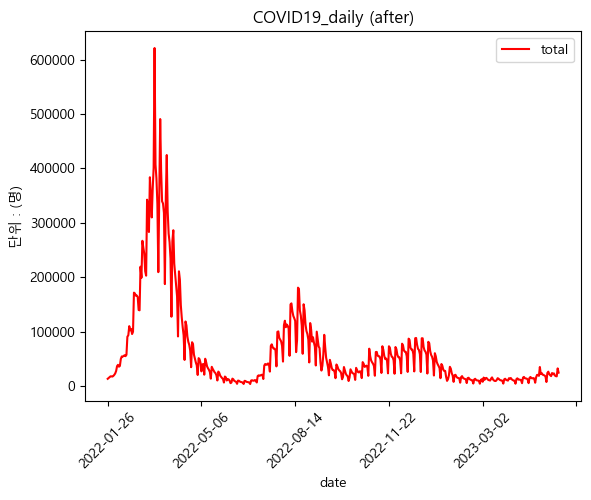

<Figure size 1000x600 with 0 Axes>

In [13]:
# 코로나19 확진자 수 추이
covid19_set = covid19.set_index('date')
covid19_set = covid19_set[covid19_set.index>='2022-01-26']
covid19_set = covid19_set.drop(['male','female'], axis=1)
covid19_set.plot(kind='line', legend=True, color='red')

plt.title('COVID19_daily (after)')
plt.ylabel('단위 : (명)')
plt.xticks(rotation=45)
plt.figure(figsize=(10, 6))
plt.show()

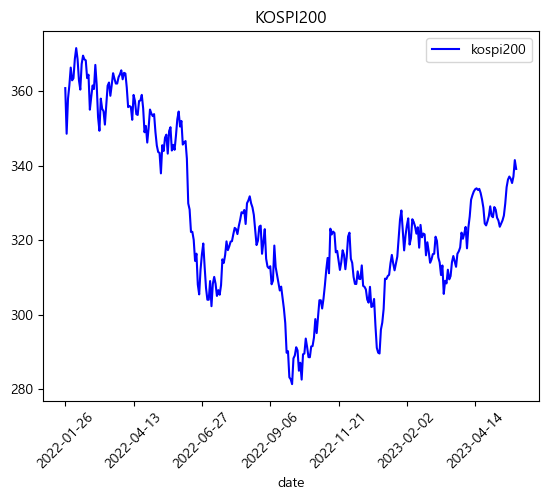

<Figure size 1000x600 with 0 Axes>

In [14]:
# kospi200 지수
numbers = pd.read_csv('./kospi200_number.csv')
numbers_set = numbers.set_index('date')
numbers_set = numbers_set[numbers_set.index>='2022-01-26']
numbers_set.plot(kind='line', legend=True, color='blue')

plt.title('KOSPI200')
plt.xticks(rotation=45)
plt.figure(figsize=(10, 6))
plt.show()

In [15]:
# kospi200 지수와 코로나19 확진자 수 간의 상관관계
numbers_covid = pd.merge(numbers, covid19_set, how='left', on='date')
numbers_covid_set = numbers_covid.set_index('date')
numbers_covid_set = numbers_covid_set[numbers_covid_set.index>='2021-01-26']
numbers_covid_set.corr()

,kospi200,total
kospi200,1.000000,0.477025
total,0.477025,1.000000


In [16]:
# 계열사 상관관계
sort_merge_pivot = pd.merge(covid19, finance_sort_pivot, how='inner', on='date')
sort_merge_pivot = sort_merge_pivot.drop(['male','female'], axis=1)
sort_merge_pivot = sort_merge_pivot.set_index('date')
sort_merge_pivot = sort_merge_pivot[sort_merge_pivot.index>='2022-01-26']
sort_merge_pivot_corr = sort_merge_pivot.corr()

sort_positive_corr_list = list(sort_merge_pivot_corr[sort_merge_pivot_corr['total'] >= 0.6].index)[1:]
sort_negative_corr_list = list(sort_merge_pivot_corr[sort_merge_pivot_corr['total'] <= -0.4].index)
sort_row_corr_list = list(sort_merge_pivot_corr[abs(sort_merge_pivot_corr['total']) <= 0.05].index)

In [17]:
# 상관 계수 유의성 검정
variable_combinations = combinations(sort_merge_pivot_corr.columns, 2)
count = 0
cannot_corr_list = []
for variable_pair in variable_combinations:
    if variable_pair[0] == 'total':
        x = sort_merge_pivot[variable_pair[0]]
        y = sort_merge_pivot[variable_pair[1]]
        correlation_coef, p_value = stats.pearsonr(x, y)

        if p_value > 0.05:
            cannot_corr_list.append(variable_pair[1])
            count += 1
            
print(cannot_corr_list, '\n')
print('검정 탈락 :', f'{count}개 기업')

['HL', 'KG', 'LIG', 'OCI', 'S-Oil', '대한유화', '메리츠금융', '씨에스윈드', '엘엑스', '영원무역홀딩스', '오뚜기', '케이티', '풍산', '한국타이어', '한미약품', '한솔', '현대자동차', '호반건설'] 

검정 탈락 : 18개 기업


In [18]:
print('긍정적 상관관계', '\n', sort_positive_corr_list)
print()
print('부정적 상관관계', '\n', sort_negative_corr_list)

긍정적 상관관계 
 ['DL', 'HDC', '네이버', '농협', '신세계', '신풍제약', '카카오', '한국전력공사']

부정적 상관관계 
 ['LS', '삼양식품', '오리온홀딩스']
